In [5]:
import tensorflow as tf
import os
# 이미지 경로 지정

base_dir = './dataset'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
train_arr = []
validation_arr = []
for train_license_plate in os.listdir(train_dir):
    train_license_plate = os.path.join(train_dir,train_license_plate)
    print(train_license_plate)
    train_arr.append(train_license_plate)
#print(test)

for validation_license_plate in os.listdir(validation_dir):
    validation_license_plate = os.path.join(validation_dir,validation_license_plate)
    print(validation_license_plate)
    validation_arr.append(validation_license_plate)

./dataset\train\1211
./dataset\train\1892
./dataset\train\2689
./dataset\train\3013
./dataset\train\3153
./dataset\train\3319
./dataset\train\5027
./dataset\train\6322
./dataset\train\7236
./dataset\train\7822
./dataset\train\8941
./dataset\train\9135
./dataset\train\9432
./dataset\train\9570
./dataset\validation\1211
./dataset\validation\1892
./dataset\validation\2689
./dataset\validation\3013
./dataset\validation\3153
./dataset\validation\3319
./dataset\validation\5027
./dataset\validation\6322
./dataset\validation\7236
./dataset\validation\7822
./dataset\validation\8941
./dataset\validation\9135
./dataset\validation\9432
./dataset\validation\9570


In [6]:
# 파일 이름과 개수
for i in train_arr:
    print(i)
    train_2207_fnames = os.listdir(i)
    print(train_2207_fnames[:5])

./dataset\train\1211
['4ef203ae-d815-435a-af43-ee410b34df28.jpg', '4fd46e06-5160-4d14-a918-693fc091ac5b.jpg', '513ab695-2287-4151-9089-18d3ff84434b.jpg', '5211201c-6ce7-4333-8129-1eea40e73bce.jpg', '7f572e80-d318-4416-9063-9085a1c14203.jpg']
./dataset\train\1892
['262c7d31-81a9-4fbf-9ca3-b072b3c12576.jpg', '39f00e5a-67f0-4144-b9e8-b1d4fc49a529.jpg', '3a447689-04dc-431e-ad46-f24aa200e950.jpg', '3b146749-de56-472c-a6e2-8ccd8da282b8.jpg', '451725d4-3e45-4604-a038-fdaeb48e0316.jpg']
./dataset\train\2689
['2f609685-3ccb-4063-b256-fbd6061bd4f9.jpg', '55950989-4f05-418c-9688-686527fd7f54.jpg', '6d48bbc1-eb0c-44ee-86e3-0c47fc20f79d.jpg', '8b23d86a-ced0-4bd0-b023-1ef87adc589f.jpg', '90b4df26-b4aa-4246-be85-1b9b6cec7475.jpg']
./dataset\train\3013
['366b1f9a-d84b-4f63-acdb-19e249aa3dfc.jpg', '3b7aba6a-1634-4238-ad11-e4d89550900e.jpg', '3cc90f4e-9fa7-4cd7-93d6-3237a371ff14.jpg', '528e3bec-c65d-45fb-86ca-a30335b8ecb0.jpg', '832be05a-dd76-4265-96fc-6468f6d925f7.jpg']
./dataset\train\3153
['4429f8e0-

In [7]:
# 모델 로드
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# VGG16 모델 로드 (include_top=False로 최상위 레이어는 제외)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# 모델의 일부 레이어 동결
for layer in base_model.layers:
    layer.trainable = False

# 카테고리 갯수
classes = len(train_arr)

# 커스텀 레이어 추가
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(classes, activation='softmax')  # num_classes는 클래스 수에 맞게 설정
])

In [8]:
# 모델 컴파일
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.0001),
              loss='categorical_crossentropy',  # 다중 분류에 적합한 손실 함수
              metrics=['accuracy'])  # 정확도는 여전히 평가 지표로 사용됨


In [1]:
# trian, validation 데이터 분할
import os
import shutil

train_dir = "./dataset/train"
validation_dir = "./dataset/validation"
validation_ratio = 0.2  # 검증 데이터셋의 비율

# 검증 데이터 폴더 생성
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)

# 클래스(카테고리) 폴더 순회
for class_name in os.listdir(train_dir):
    class_dir = os.path.join(train_dir, class_name)
    if os.path.isdir(class_dir):
        # 검증 데이터셋을 위한 폴더 생성
        validation_class_dir = os.path.join(validation_dir, class_name)
        if not os.path.exists(validation_class_dir):
            os.mkdir(validation_class_dir)
        
        # 해당 클래스 폴더에 있는 이미지 파일들 가져오기
        image_files = [f for f in os.listdir(class_dir) if f.endswith(".jpg")]
        
        # 검증 데이터셋으로 이동할 이미지 개수 계산
        num_validation_images = int(len(image_files) * validation_ratio)
        
        # 검증 데이터셋으로 이미지 이동
        for i in range(num_validation_images):
            src_image_path = os.path.join(class_dir, image_files[i])
            dst_image_path = os.path.join(validation_class_dir, image_files[i])
            shutil.move(src_image_path, dst_image_path)
            print(f"Moved {src_image_path} to {dst_image_path}")


Moved ./dataset/train\1211\0c183f15-1d61-46a1-8bf1-131d22d78f04.jpg to ./dataset/validation\1211\0c183f15-1d61-46a1-8bf1-131d22d78f04.jpg
Moved ./dataset/train\1211\20cdaf28-f35f-4e3f-8dce-f0446e21275a.jpg to ./dataset/validation\1211\20cdaf28-f35f-4e3f-8dce-f0446e21275a.jpg
Moved ./dataset/train\1211\420b20e6-0355-498f-a8d6-3964e0c37432.jpg to ./dataset/validation\1211\420b20e6-0355-498f-a8d6-3964e0c37432.jpg
Moved ./dataset/train\1211\4e9c284c-f74e-458d-894f-d480f44def3f.jpg to ./dataset/validation\1211\4e9c284c-f74e-458d-894f-d480f44def3f.jpg
Moved ./dataset/train\1892\03a1b71c-3472-4a20-82ae-f7503fc66512.jpg to ./dataset/validation\1892\03a1b71c-3472-4a20-82ae-f7503fc66512.jpg
Moved ./dataset/train\1892\07b1b897-c56c-455f-b1b0-5f1d32f59c5a.jpg to ./dataset/validation\1892\07b1b897-c56c-455f-b1b0-5f1d32f59c5a.jpg
Moved ./dataset/train\1892\08151b8a-5072-4796-8c0d-5fbddd007484.jpg to ./dataset/validation\1892\08151b8a-5072-4796-8c0d-5fbddd007484.jpg
Moved ./dataset/train\1892\1a3729d

In [26]:
# 데이터 증강
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1.0/255.,
    rotation_range=5,         # 회전 각도 범위 설정
    width_shift_range=0.2,     # 가로 이동 범위 설정
    height_shift_range=0.2,    # 세로 이동 범위 설정
    shear_range=0.2,           # 전단 강도 범위 설정
    zoom_range=0.2,            # 확대/축소 범위 설정
    #horizontal_flip=True,      # 수평 반전 여부
    fill_mode='nearest'        # 새로운 픽셀 채우는 방식
)

validation_datagen = ImageDataGenerator(
    rescale=1.0/255.,
    rotation_range=5,         # 회전 각도 범위 설정
    width_shift_range=0.2,     # 가로 이동 범위 설정
    height_shift_range=0.2,    # 세로 이동 범위 설정
    zoom_range=0.2,            # 확대/축소 범위 설정
)

train_generator = train_datagen.flow_from_directory(train_dir, batch_size=10,
                                                    class_mode='categorical', target_size=(150, 150))
validation_generator = validation_datagen.flow_from_directory(validation_dir, batch_size=10,
                                                        class_mode='categorical', target_size=(150, 150))


Found 254 images belonging to 14 classes.


Found 56 images belonging to 14 classes.


In [27]:
# 데이터 증강 후 이미지 갯수
train_batch_size = 10
validation_batch_size = 10

# train_generator의 증강된 이미지 총 개수 계산
total_train_samples = len(train_generator) * train_batch_size

# validation_generator의 증강된 이미지 총 개수 계산
total_validation_samples = len(validation_generator) * validation_batch_size

print("Total augmented images in train_generator:", total_train_samples)
print("Total augmented images in validation_generator:", total_validation_samples)


Total augmented images in train_generator: 260
Total augmented images in validation_generator: 60


In [28]:
# 모델 훈련하기
history = model.fit(train_generator, validation_data=validation_generator,
                    steps_per_epoch=10, epochs=20,
                    validation_steps=10, verbose=2)

# 가중치 저장
model.save('complete_model.h5')

Epoch 1/20


10/10 - 5s - loss: 2.3869 - accuracy: 0.2400 - val_loss: 2.0786 - val_accuracy: 0.3214 - 5s/epoch - 469ms/step
Epoch 2/20
10/10 - 3s - loss: 2.2800 - accuracy: 0.2234 - 3s/epoch - 295ms/step
Epoch 3/20
10/10 - 3s - loss: 2.0263 - accuracy: 0.3936 - 3s/epoch - 297ms/step
Epoch 4/20
10/10 - 3s - loss: 1.8485 - accuracy: 0.4200 - 3s/epoch - 317ms/step
Epoch 5/20
10/10 - 3s - loss: 1.8089 - accuracy: 0.4043 - 3s/epoch - 294ms/step
Epoch 6/20
10/10 - 3s - loss: 1.6599 - accuracy: 0.4400 - 3s/epoch - 309ms/step
Epoch 7/20
10/10 - 3s - loss: 1.5364 - accuracy: 0.5300 - 3s/epoch - 314ms/step
Epoch 8/20
10/10 - 3s - loss: 1.6349 - accuracy: 0.4149 - 3s/epoch - 295ms/step
Epoch 9/20
10/10 - 3s - loss: 1.3767 - accuracy: 0.6000 - 3s/epoch - 309ms/step
Epoch 10/20
10/10 - 3s - loss: 1.3331 - accuracy: 0.5957 - 3s/epoch - 296ms/step
Epoch 11/20
10/10 - 3s - loss: 1.2590 - accuracy: 0.6300 - 3s/epoch - 317ms/step
Epoch 12/20
10/10 - 3s - loss: 1.2894 - accuracy: 0.5600 - 3s/epoch - 315ms/step
Epoch 

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


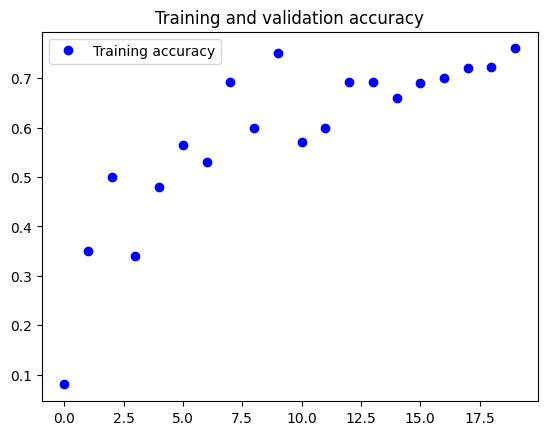

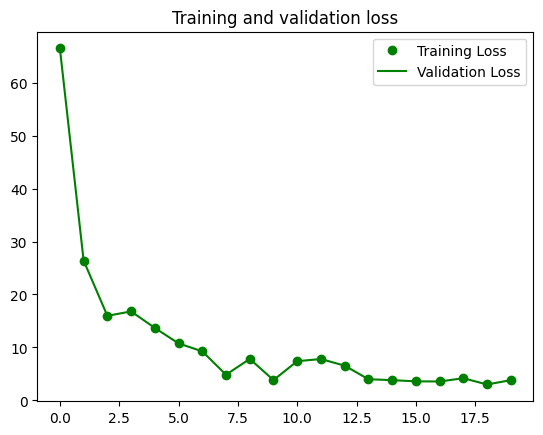

In [11]:
# 정확도와 손실 확인

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
#plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label = 'Training Loss')
plt.plot(epochs, loss, 'g', label = 'Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [43]:
from keras.preprocessing import image
import numpy as np

# 이미지 경로 설정
path = './dataset/test/test2.jpg'

# 이미지 로드 및 크기 조정
img = image.load_img(path, target_size=(150, 150))

# 이미지 배열로 변환 및 차원 확장
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

# 이미지 데이터 정규화
x = x / 255.0

# 모델로 예측 수행
predictions = model.predict(x)[0]  # 첫 번째 이미지에 대한 예측 결과

# 클래스 이름 설정 (클래스 이름 리스트가 있다면 해당 리스트 사용)
class_names = []
for i in train_arr:
    class_names.append(i[-4:])
#class_names = ['CassFresh', 'budweiser', 'filite', 'hineken', 'jinro']  # 예시 클래스 이름
print(class_names)

# 확률이 높은 상위 3개 클래스 출력
top_classes_indices = np.argsort(predictions)[::-1][:3]  # 상위 3개 클래스의 인덱스
for i, class_index in enumerate(top_classes_indices):
    class_name = class_names[class_index]
    confidence = predictions[class_index] * 100
    print(f'Rank {i+1}: Predicted class: {class_name}, Confidence: {confidence:.2f}%')


1/1 [==============================] - 0s 52ms/step
['1211', '1892', '2689', '3013', '3153', '3319', '5027', '6322', '7236', '7822', '8941', '9135', '9432', '9570']
Rank 1: Predicted class: 9432, Confidence: 91.20%
Rank 2: Predicted class: 6322, Confidence: 2.65%
Rank 3: Predicted class: 1892, Confidence: 1.64%
